# Week 10: Colab Experiment

# I. Introduction
In this exercise, we apply CNN to MNIST data to classify the hand written digits.

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import random


# Data Loading
Load the data from the MNIST dataset

In [ ]:
# Run this once to load the train and test data straight into a dataloader class
# that will provide the batches
batch_size_train = 64
batch_size_test = 1000
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

# Visualize dataset sample
Show some sample.

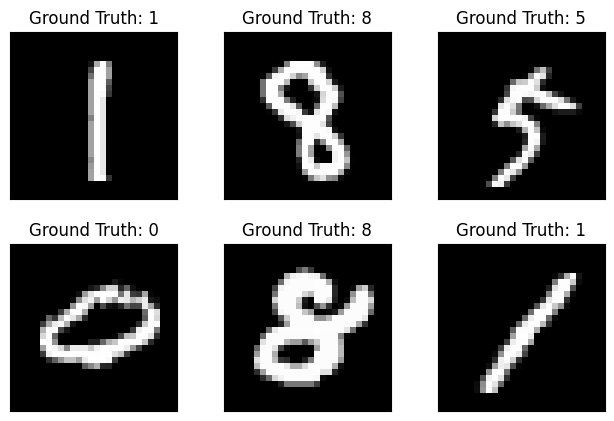

In [ ]:

# Let's draw some of the training data
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()

# II. Methods


In [ ]:
from os import X_OK

# This class implements a minimal network (which still does okay)
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Valid convolution, 1 channel in, 2 channels out, stride 1, kernel size = 3
        self.conv1 = nn.Conv2d(1, 2, kernel_size=3)
        # Dropout for convolutions
        self.drop = nn.Dropout2d()
        # Fully connected layer
        self.fc1 = nn.Linear(338, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.drop(x)
        x = F.max_pool2d(x,2)
        x = F.relu(x)
        x = x.flatten(1)
        x = self.fc1(x)
        x = F.log_softmax(x)
        return x



In [ ]:
# TODO Change above Net to Net2 class to implement
# 1. A valid convolution with kernel size 5, 1 input channel and 10 output channels
# 2. A max pooling operation over a 2x2 area
# 3. A Relu
# 4. A valid convolution with kernel size 5, 10 input channels and 20 output channels
# 5. A 2D Dropout layer
# 6. A max pooling operation over a 2x2 area
# 7. A relu
# 8. A flattening operation
# 9. A fully connected layer mapping from (whatever dimensions we are at-- find out using .shape) to 50
# 10. A ReLU
# 11. A fully connected layer mapping from 50 to 10 dimensions
# 12. A softmax function.

class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        # Valid convolution, 1 channel in, 10 channels out, kernel size = 5
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        # Valid convolution, 10 channel in, 20 channels out, kernel size = 5
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.drop = nn.Dropout2d()
        self.fc1 = nn.Linear(20 * 4 * 4, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.max_pool2d(x,2)
        x = F.relu(x)
        x = self.conv2(x)
        x = self.drop(x)
        x = F.max_pool2d(x,2)
        x = F.relu(x)
        x = x.flatten(1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.log_softmax(x)
        return x


In [ ]:

# He initialization of weights
def weights_init(layer_in):
  if isinstance(layer_in, nn.Linear):
    nn.init.kaiming_uniform_(layer_in.weight)
    layer_in.bias.data.fill_(0.0)

In [ ]:
# Main training routine
# TODO: Read it and understand what it does, you would need to implement it in the next colab HW
def train(epoch, model):
  model.train()
  # Get each
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    # Store results
    if batch_idx % 10 == 0:

      pred = output.data.max(1, keepdim=True)[1]
      correct = pred.eq(target.data.view_as(pred)).sum()
      print('Train Epoch: {} [{}/{}]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset), loss.item()))

In [ ]:
# Run on test data
# TODO: Read it and understand what it does, you would need to implement it in the next colab HW
def test(model):
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = model(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))
  return 100. * correct / len(test_loader.dataset)

In [ ]:
# Train and test Model 1

# Create network
model = Net()
# Initialize model weights
model.apply(weights_init)
# Define optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

# Get initial performance
test(model)
# Train for ten epochs
n_epochs = 10
for epoch in range(1, n_epochs + 1):
  train(epoch, model)
accuracy1 = test(model)


<ipython-input-26-b8ebf8cbff0b>:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(x)



Test set: Avg. loss: 2.9730, Accuracy: 882/10000 (9%)

Train Epoch: 1 [0/60000]	Loss: 3.377559
Train Epoch: 1 [640/60000]	Loss: 2.328599
Train Epoch: 1 [1280/60000]	Loss: 2.331368
Train Epoch: 1 [1920/60000]	Loss: 2.294677
Train Epoch: 1 [2560/60000]	Loss: 2.163913
Train Epoch: 1 [3200/60000]	Loss: 2.213560
Train Epoch: 1 [3840/60000]	Loss: 2.084686
Train Epoch: 1 [4480/60000]	Loss: 2.019122
Train Epoch: 1 [5120/60000]	Loss: 1.882441
Train Epoch: 1 [5760/60000]	Loss: 1.923202
Train Epoch: 1 [6400/60000]	Loss: 1.698973
Train Epoch: 1 [7040/60000]	Loss: 1.386831
Train Epoch: 1 [7680/60000]	Loss: 1.632334
Train Epoch: 1 [8320/60000]	Loss: 1.436194
Train Epoch: 1 [8960/60000]	Loss: 1.193733
Train Epoch: 1 [9600/60000]	Loss: 1.280024
Train Epoch: 1 [10240/60000]	Loss: 1.285253
Train Epoch: 1 [10880/60000]	Loss: 1.069128
Train Epoch: 1 [11520/60000]	Loss: 1.009951
Train Epoch: 1 [12160/60000]	Loss: 1.163940
Train Epoch: 1 [12800/60000]	Loss: 1.521019
Train Epoch: 1 [13440/60000]	Loss: 1.213

In [ ]:
# Train and test Model 2

# Create network
model2 = Net2()
# Initialize model weights
model2.apply(weights_init)
# Define optimizer
optimizer = optim.SGD(model2.parameters(), lr=0.01, momentum=0.5)

# Get initial performance
test(model2)
# Train for ten epochs
n_epochs = 10
for epoch in range(1, n_epochs + 1):
  train(epoch, model2)
accuracy2 = test(model2)

<ipython-input-28-b4df5afe933b>:38: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(x)



Test set: Avg. loss: 2.4300, Accuracy: 779/10000 (8%)

Train Epoch: 1 [0/60000]	Loss: 2.610041
Train Epoch: 1 [640/60000]	Loss: 2.191328
Train Epoch: 1 [1280/60000]	Loss: 2.002594
Train Epoch: 1 [1920/60000]	Loss: 1.763404
Train Epoch: 1 [2560/60000]	Loss: 1.595986
Train Epoch: 1 [3200/60000]	Loss: 1.545032
Train Epoch: 1 [3840/60000]	Loss: 1.195713
Train Epoch: 1 [4480/60000]	Loss: 1.107968
Train Epoch: 1 [5120/60000]	Loss: 1.342009
Train Epoch: 1 [5760/60000]	Loss: 0.878921
Train Epoch: 1 [6400/60000]	Loss: 0.747351
Train Epoch: 1 [7040/60000]	Loss: 1.256157
Train Epoch: 1 [7680/60000]	Loss: 0.648553
Train Epoch: 1 [8320/60000]	Loss: 0.473850
Train Epoch: 1 [8960/60000]	Loss: 0.727336
Train Epoch: 1 [9600/60000]	Loss: 0.706552
Train Epoch: 1 [10240/60000]	Loss: 0.633360
Train Epoch: 1 [10880/60000]	Loss: 0.445729
Train Epoch: 1 [11520/60000]	Loss: 0.670080
Train Epoch: 1 [12160/60000]	Loss: 0.693154
Train Epoch: 1 [12800/60000]	Loss: 0.603127
Train Epoch: 1 [13440/60000]	Loss: 0.648

## III. Results

Here we train the CNN model and apply it to the test set. There are 10 epochs in training. There is no validation set here, we simply take the model at the end of the training procedure.

In [ ]:
print(f"Model 1 Accuracy: {round(float(accuracy1.numpy()),2)}%")
print(f"Model 2 Accuracy: {round(float(accuracy2.numpy()),2)}%")

Model 1 Accuracy: 92.38%
Model 2 Accuracy: 98.88%


<ipython-input-26-b8ebf8cbff0b>:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(x)


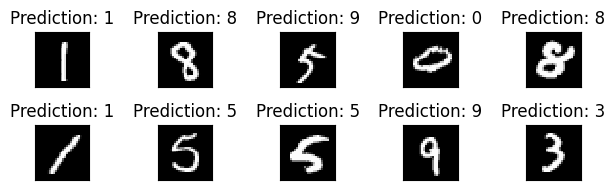

In [ ]:
# Run network on data we got before and show predictions
output = model(example_data)

fig = plt.figure()
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
plt.show()

<ipython-input-28-b4df5afe933b>:38: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(x)


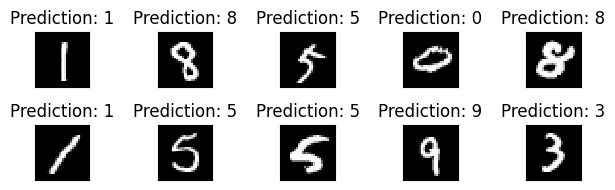

In [ ]:
# Run network on data we got before and show predictions
output = model2(example_data)

fig = plt.figure()
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
plt.show()

# IV. Conclusion and Discussion

# Write something

In [ ]:
#The first model (93% accuracy) performs worse than the second model (99% accuracy).
#The reason is that the second model contains a deeper architecture, which may have more capacity to learn more infomation from the features.
#Besides, the second model uses dropout method, which is a regularization technique that combats overfitting.
#Last but not least, maybe the value of parameters of the second model is beneficial for this task, and then the number of the parameters
#of the second model is enough to learn the representation of the data.
#Hence, the second model has a better performance.